<a href="https://colab.research.google.com/github/ravishankarramakrishnan/Data_Science-Projects/blob/master/Predicting_SilicaPerc_Mining_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicting the Percentage of Silica Concentrate in the Iron Ore Concentrate per Minute.

Company using this: Freeport McMoRan

In [21]:
# Importing the Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

import warnings
warnings.filterwarnings('ignore')

In [22]:
# Importing the Dataset

data = pd.read_csv('/content/drive/My Drive/Projects/Mining Quality Prediction Using Machine & Deep Learning/mining_data.csv')

# Validate the Data
data.head(3).append(data.tail(2))

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,55.20,16.98,3196.680000,542.694333,396.284000,10.158367,1.668070,249.796333,250.275667,248.668000,295.096000,306.400000,250.447667,250.547000,464.978667,490.450333,443.465000,442.856333,438.782333,452.248333,466.300667,67.06,1.11
1,55.20,16.98,3213.673333,540.649333,397.949333,10.156600,1.664973,249.536000,250.752000,250.968333,295.096000,306.400000,250.235667,249.807000,445.001000,362.894667,442.748333,471.045333,445.239667,443.630667,426.921667,67.06,1.11
2,55.20,16.98,3180.080000,535.929333,397.305000,10.154800,1.661877,249.576000,250.279667,251.001333,295.096000,306.400000,250.634667,249.686667,443.574667,478.916333,432.779333,437.401667,441.761000,490.824667,478.046667,67.06,1.11
245698,49.75,23.20,2698.756667,460.303667,384.490667,9.620873,1.653653,302.603000,299.953333,299.483667,299.962667,299.201667,345.632667,285.945000,395.502667,443.776333,872.247333,416.832667,495.943333,437.163000,417.842667,64.27,1.71
245699,49.75,23.20,1673.480000,486.685000,384.424333,9.616857,1.653240,302.189000,300.740333,298.719000,299.338667,298.640333,347.835667,280.703000,409.253333,460.097000,875.170667,401.933000,501.938333,350.411000,436.092667,64.27,1.71


In [23]:
# Get the Info of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245700 entries, 0 to 245699
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   % Iron Feed                   245700 non-null  float64
 1   % Silica Feed                 245700 non-null  float64
 2   Starch Flow                   245700 non-null  float64
 3   Amina Flow                    245700 non-null  float64
 4   Ore Pulp Flow                 245700 non-null  float64
 5   Ore Pulp pH                   245700 non-null  float64
 6   Ore Pulp Density              245700 non-null  float64
 7   Flotation Column 01 Air Flow  245700 non-null  float64
 8   Flotation Column 02 Air Flow  245700 non-null  float64
 9   Flotation Column 03 Air Flow  245700 non-null  float64
 10  Flotation Column 04 Air Flow  245700 non-null  float64
 11  Flotation Column 05 Air Flow  245700 non-null  float64
 12  Flotation Column 06 Air Flow  245700 non-nul

In [24]:
# get the Descriptive Statistics
data.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000
mean,56.294974,14.651438,2869.241181,488.144186,397.577332,9.767534,1.680348,280.166032,277.172893,281.097236,299.449878,299.914710,292.091324,290.774336,520.242050,522.648563,531.355055,420.306805,425.237994,429.927646,421.006767,65.049435,2.327228
std,5.158958,6.808961,1187.990184,90.736360,9.468496,0.387036,0.069213,29.616570,29.936823,28.537193,2.494772,3.528870,29.880553,28.158596,130.389539,127.450562,150.614529,90.566437,83.601851,85.320602,83.736727,1.118479,1.125623
min,42.740000,1.310000,0.074147,241.699632,376.272600,8.753370,1.519829,175.666333,175.923177,176.471917,292.727820,286.713174,192.261000,186.074077,149.451600,211.266111,126.352031,162.293185,167.139620,161.485667,175.908240,62.050000,0.600000
25%,52.670000,8.940000,2073.322500,432.204667,395.212583,9.527157,1.647197,250.268667,250.367333,250.693667,298.733333,298.441667,265.997568,263.524333,413.516320,442.291000,410.134583,356.440167,357.074583,358.078583,356.567833,64.370000,1.440000
50%,56.080000,13.850000,2994.311667,504.510667,399.354833,9.797963,1.697560,299.418000,297.433000,299.048333,299.812667,299.907667,299.621667,299.350833,492.971167,496.380667,494.859500,410.511667,408.022833,419.931167,410.043333,65.210000,2.000000
75%,59.720000,19.600000,3712.951667,553.479083,402.458750,10.037833,1.728257,300.127333,300.435000,300.308667,300.413000,301.353333,301.381000,301.239667,594.960083,595.989167,601.060000,486.533417,485.580833,490.725500,475.922283,65.860000,3.010000
max,65.780000,33.400000,6295.130657,739.422405,418.625439,10.808046,1.853229,372.387588,369.550000,359.948635,305.853500,309.944913,368.052586,370.190800,862.197932,828.593000,886.820204,680.019967,675.571459,698.621871,659.618696,68.010000,5.530000


In [25]:
# Get the Null values in the Dataframe
data.isnull().sum()

% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

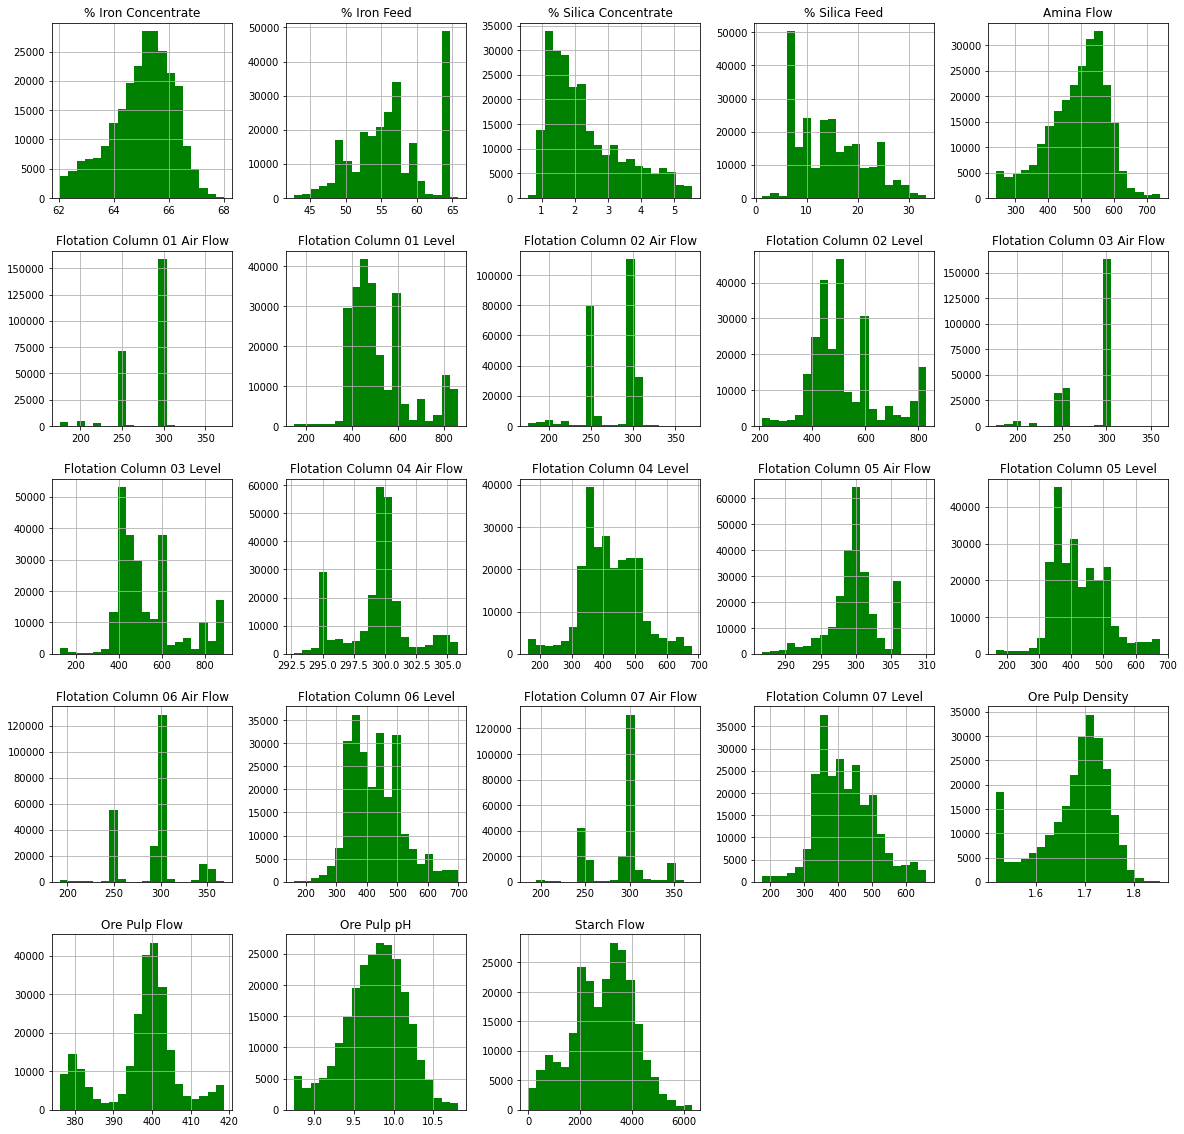

In [26]:
# Data Visualisation

# Plot a Histogram on all Columns
data.hist(bins= 20, figsize= (20,20), color= "g")
plt.show();

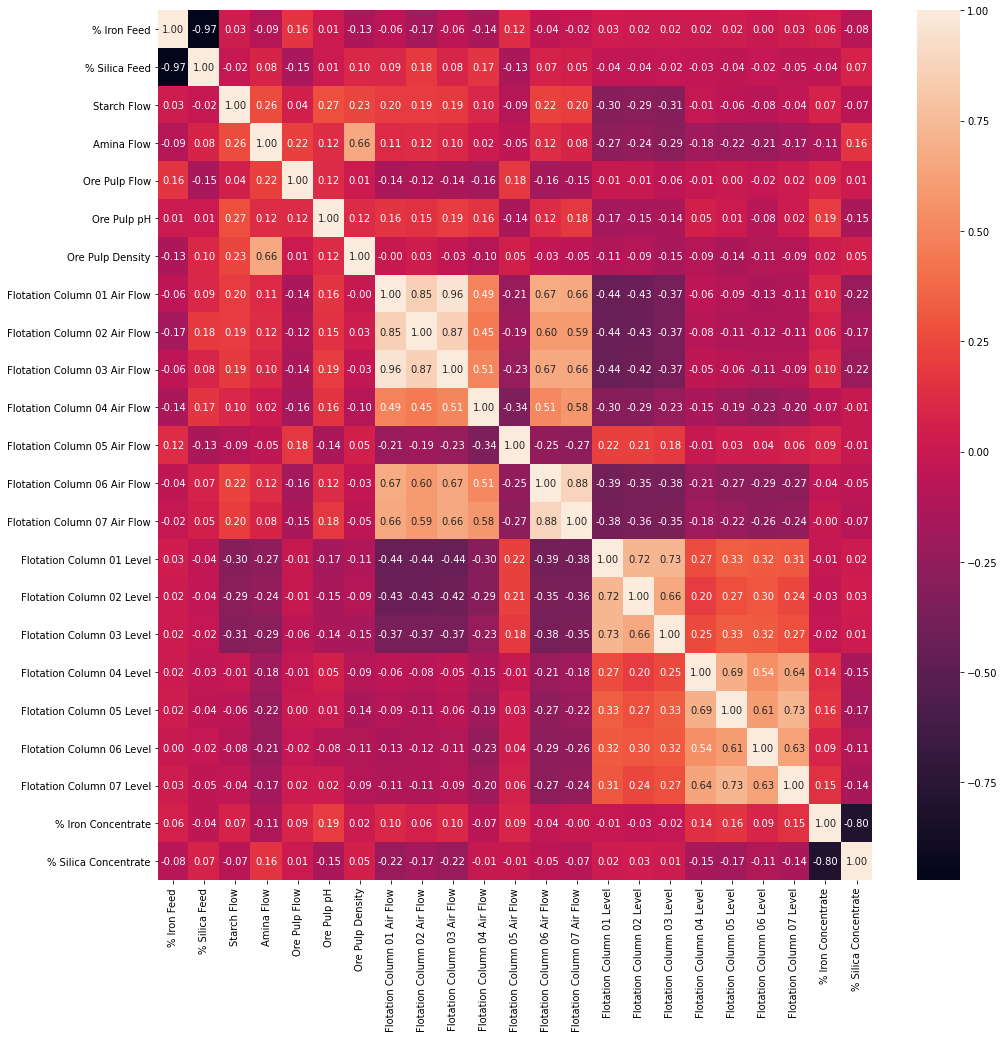

In [27]:
# Plot Correlation Matrix
plt.figure(figsize= (16,16))
sns.heatmap(data.corr(), annot= True, fmt= ".2f")
plt.show();

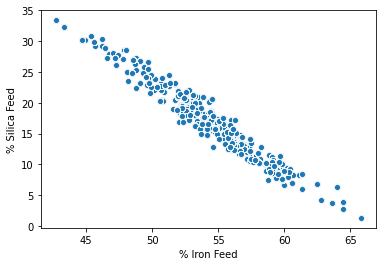

In [28]:
# Plots for High Correlated Values

sns.scatterplot(data['% Iron Feed'], data['% Silica Feed']);

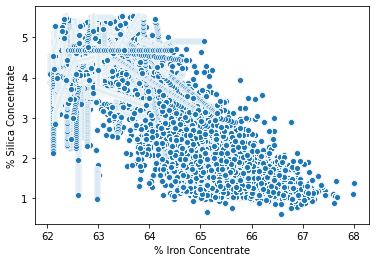

In [29]:
sns.scatterplot(data['% Iron Concentrate'], data['% Silica Concentrate']);

In [30]:
# Data Preparation

X = data.drop(columns= '% Silica Concentrate')
y = data['% Silica Concentrate']

# Convert the data as arrays
X = np.array(X)
y = np.array(y)

# Validate the Shape
print(f"The Shape of X is {X.shape} and y is {y.shape}")

The Shape of X is (245700, 22) and y is (245700,)


In [31]:
# Reshape the Data to bring y to Add a Dimension: (245700,) to (245700, 1)

y = y.reshape(-1, 1)
print(f"The Shape of y is {y.shape}")

The Shape of y is (245700, 1)


In [32]:
# Perform Scaling before feeding the Model

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Perform Scaling
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

# Valdiate them
print("Scaled X Value is: \n", X[:3])
print("Scaled y Value is: \n", y[:3])

Scaled X Value is: 
 [[-0.21224761  0.34198555  0.27562474  0.60119514 -0.1365935   1.00981181
  -0.17740101 -1.02543138 -0.89846813 -1.13638723 -1.74520446  1.83778494
  -1.39367373 -1.42860171 -0.42383382 -0.25263361 -0.58354419  0.24898378
   0.16201037  0.26161012  0.54090951  1.79759201]
 [-0.21224761  0.34198555  0.28992904  0.57865727  0.03928836  1.0052472
  -0.22214222 -1.03422152 -0.88255681 -1.05577881 -1.74520446  1.83778494
  -1.40076866 -1.45488148 -0.57704939 -1.25346031 -0.58830249  0.56023658
   0.23924965  0.16060656  0.07063701  1.79759201]
 [-0.21224761  0.34198555  0.26165153  0.52663833 -0.028762    1.00059646
  -0.26688344 -1.03287093 -0.89833451 -1.05462242 -1.74520446  1.83778494
  -1.38741547 -1.4591549  -0.58798842 -0.34313163 -0.65449145  0.18875531
   0.19763964  0.7137449   0.68118277  1.79759201]]
Scaled y Value is: 
 [[-1.08138385]
 [-1.08138385]
 [-1.08138385]]


In [33]:
# Splitting the Data for Training the Model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

print(f"The Shape of X_train is {X_train.shape} and y_train is {y_train.shape}")
print(f"The Shape of X_test is {X_test.shape} and y_test is {y_test.shape}")

The Shape of X_train is (196560, 22) and y_train is (196560, 1)
The Shape of X_test is (49140, 22) and y_test is (49140, 1)


In [34]:
# Building a Linear Regression Model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from math import sqrt

# Building the Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print("The Model Coefficients are:", lr_model.coef_)
print("The Model Intercept is:", lr_model.intercept_)

# Check the Score
acc_lr_model = lr_model.score(X_test, y_test)
print(f"The Accuracy of our Linear Regression Model is {acc_lr_model:.2f}")

The Model Coefficients are: [[ 0.1161866   0.17518185 -0.01915751  0.05511242  0.03659668  0.01557897
   0.01047017 -0.13208702 -0.04308774 -0.02375467  0.00365617  0.04826739
  -0.00729336  0.03787265 -0.03418417 -0.01905697 -0.00953914 -0.0100571
  -0.01453537 -0.01823715  0.0159777  -0.78323537]]
The Model Intercept is: [0.00034688]
The Accuracy of our Linear Regression Model is 0.68


In [35]:
# Model using Decision Tree Regressor [DT can perform both Classification and Regression]
# Intuition: https://www.saedsayad.com/decision_tree_reg.htm

from sklearn.tree import DecisionTreeRegressor

# Instantiate the Model
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

# Check the Score
acc_dt_model = dt_reg.score(X_test, y_test)
print(f"The Accuracy of our Decision Tree Regressor Model is {acc_dt_model:.2f}")

The Accuracy of our Decision Tree Regressor Model is 0.98


Feature: 0, Score: 0.03179
Feature: 1, Score: 0.03868
Feature: 2, Score: 0.00940
Feature: 3, Score: 0.01802
Feature: 4, Score: 0.00689
Feature: 5, Score: 0.02435
Feature: 6, Score: 0.01463
Feature: 7, Score: 0.01814
Feature: 8, Score: 0.00567
Feature: 9, Score: 0.00437
Feature: 10, Score: 0.01321
Feature: 11, Score: 0.01243
Feature: 12, Score: 0.00493
Feature: 13, Score: 0.00094
Feature: 14, Score: 0.01245
Feature: 15, Score: 0.01066
Feature: 16, Score: 0.01738
Feature: 17, Score: 0.00244
Feature: 18, Score: 0.00689
Feature: 19, Score: 0.00514
Feature: 20, Score: 0.00327
Feature: 21, Score: 0.73831


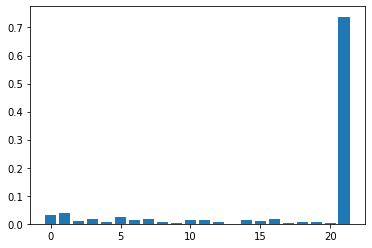

In [56]:
# Get the Decision Tree Model importance
importance = dt_reg.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance
from matplotlib import pyplot

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show();

In [36]:
# Building a Random Forest Regressor Model

from sklearn.ensemble import RandomForestRegressor

# Instantiate the Model
rf_reg = RandomForestRegressor(n_estimators= 100, max_depth= 10)
rf_reg.fit(X_train, y_train)

# Check the Score
acc_rf_model = rf_reg.score(X_test, y_test)
print(f"The Accuracy of our Random Forest Regressor Model is {acc_rf_model:.2f}")
# Model failed to Generalise well as it learnt Training Data well. # To Make it fast, try using only values and not the y dimension (y, ) instead of (y,1)

The Accuracy of our Random Forest Regressor Model is 0.89


In [43]:
# Modelling using Artificial Neural Networks - Deep Learning

# Bias allows us to shift the Activation Function curve Up or Down

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential

# Building the ANN Model
model = Sequential()
# model = Dense(250, input_dim= 22, kernel_initializer= "normal", activation= "relu") (model) - This gives error as to 'Sequential' object has no attribute 'shape'
model.add(Dense(250, input_dim= 22, kernel_initializer= "normal", activation= "relu"))
model.add(Dense(500, activation= "relu"))
model.add(Dropout(0.1)) # Dropout added to Avoid/Overcome Neuron InterDependancy - We Apply Regularisation Technique (Dropout)
model.add(Dense(units= 1000, activation= "relu"))
model.add(Dropout(0.1))
model.add(Dense(units= 1000, activation= "relu"))
model.add(Dropout(0.1))
model.add(Dense(units= 500, activation= "relu"))
model.add(Dropout(0.1))
model.add(Dense(units= 250, activation= "relu"))
model.add(Dropout(0.1))
model.add(Dense(units= 128, activation= "relu"))
# Output
model.add(Dense(1, activation= "linear"))

# Initialize the Optimizer
optimizer = Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2= 0.999, epsilon= 1e-07, amsgrad= False)

# Compile the Model
model.compile(loss= "mse", optimizer= optimizer)
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 250)               5750      
_________________________________________________________________
dense_12 (Dense)             (None, 500)               125500    
_________________________________________________________________
dropout_5 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1000)              501000    
_________________________________________________________________
dropout_6 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_7 (Dropout)          (None, 1000)             

In [44]:
# Fit and Train the DL Model
history = model.fit(X_train, y_train, batch_size= 64, epochs= 7, validation_split= 0.2, verbose= 1)

Epoch 1/7
2457/2457 [==============================] - 16s 6ms/step - loss: 0.2033 - val_loss: 0.1711
Epoch 2/7
2457/2457 [==============================] - 16s 7ms/step - loss: 0.1352 - val_loss: 0.1123
Epoch 3/7
2457/2457 [==============================] - 16s 6ms/step - loss: 0.1100 - val_loss: 0.1021
Epoch 4/7
2457/2457 [==============================] - 16s 6ms/step - loss: 0.0951 - val_loss: 0.0837
Epoch 5/7
2457/2457 [==============================] - 15s 6ms/step - loss: 0.0850 - val_loss: 0.0736
Epoch 6/7
2457/2457 [==============================] - 15s 6ms/step - loss: 0.0789 - val_loss: 0.0702
Epoch 7/7
2457/2457 [==============================] - 15s 6ms/step - loss: 0.0738 - val_loss: 0.0675


In [46]:
# Evaluate the Model by checking Loss and Accuracy

result_loss = model.evaluate(X_test, y_test)
acc_ann = 1 - result_loss
print(f"The Accuracy of the Artificial Neural Network Model is {acc_ann:.2f}")

1536/1536 [==============================] - 5s 3ms/step - loss: 0.0679
The Accuracy of the Artificial Neural Network Model is 0.93


In [47]:
print(f"The Keys of the Trained Model are {history.history.keys()}")

The Keys of the Trained Model are dict_keys(['loss', 'val_loss'])


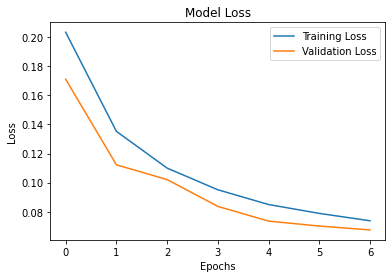

In [48]:
# Plot the Loss Plot

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['Training Loss', 'Validation Loss'], loc= "upper right")
plt.show();

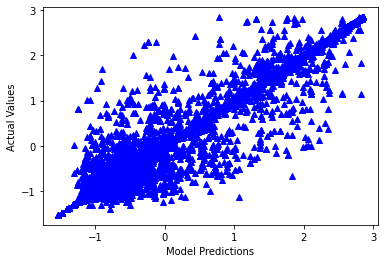

In [50]:
# Comparing Model Performance and Calculating Model KPI's

# Best Model till Now - Decision Tree Regressor
y_predict = dt_reg.predict(X_test)

# Plot the Predictions and Actuals
plt.plot(y_predict, y_test, '^', color= "b")
plt.xlabel("Model Predictions")
plt.ylabel("Actual Values")
plt.show();

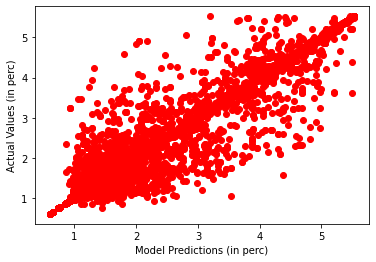

In [52]:
# Instead of -1 to 3, Transform to Original Values

y_pred_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

# Plot the Predictions and Actuals
plt.plot(y_pred_orig, y_test_orig, 'o', color= "r")
plt.xlabel("Model Predictions (in perc)")
plt.ylabel("Actual Values (in perc)")
plt.show();

In [55]:
# Evaluate the Model via Regression Metrics

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

k = X_test.shape[1] # Cols
n = len(X_test)

# Evaluations
RMSE = float(format(sqrt(mean_squared_error(y_test_orig, y_pred_orig)), '.3f'))
MSE = mean_squared_error(y_test_orig, y_pred_orig)
MAE = mean_absolute_error(y_test_orig, y_pred_orig)
R2 = r2_score(y_test_orig, y_pred_orig)
Adj_R2 = 1 - (1 - R2) * (n - 1) / (n - k - 1)

print("The Root Mean Squared Error Value is:", format(RMSE, '.3f'))
print("The Mean Squared Error Value is:", format(MSE, '.3f'))
print("The Mean Absolute Error Value is:", format(MAE, '.3f'))
print("The R-Squared Value is:", format(R2, '.3f'))
print("The Adjusted R-Squared Value is:", format(Adj_R2, '.3f'))

The Root Mean Squared Error Value is: 0.147
The Mean Squared Error Value is: 0.022
The Mean Absolute Error Value is: 0.023
The R-Squared Value is: 0.983
The Adjusted R-Squared Value is: 0.983


R2 of .98 Means 98% of Variations in the Output are being Explained by variations in the Input.
